<a href="https://colab.research.google.com/github/Dua-Sharif/Machine-Learning/blob/main/Lab03_AI-22303.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cost Function & Gradient Descent Linear Regession**

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [13]:
dataset = pd.read_csv('/content/Insurance.csv')
dataset.head()

,NumOfClaims,Payments
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [14]:
X = dataset['NumOfClaims'].values
Y = dataset['Payments'].values
m=len(X)

In [15]:
cost_history = []
theta0_history = []
theta1_history = []

In [16]:
def cost_func(X, Y, theta0, theta1):
    cost = 0
    for i in range(m):
        predicted = theta0 + theta1 * X[i]
        cost += (predicted - Y[i])**2
    return cost / (2 * m)

In [17]:
def grad_descent(X, Y, theta0, theta1, alpha, iterations):
    for i in range(iterations):
        sum_theta0 = 0
        sum_theta1 = 0
        for j in range(m):
            prediction = theta0 + theta1 * X[j]
            error = prediction - Y[j]
            sum_theta0 += error
            sum_theta1 += error * X[j]

        theta0 -= (alpha / m) * sum_theta0
        theta1 -= (alpha / m) * sum_theta1

        cost = cost_func(X, Y, theta0, theta1)
        cost_history.append(cost)
        theta0_history.append(theta0)
        theta1_history.append(theta1)

    return theta0, theta1


In [18]:
theta0=0  #intercept
theta1=0  #slope
iterations=100
alpha=0.0001 #learning rate
theta0, theta1 = grad_descent(X, Y, theta0, theta1, alpha, iterations)

In [19]:
print("Intercept:",theta0)
print("Slope:",theta1)
print("Cost Function:",cost_func(X,Y,theta0,theta1))
print("Cost_history:",cost_history)

Intercept: 0.11886100301450306
Slope: 3.630897097558325
Cost Function: 474.9015168526076
Cost_history: [7806.044483403091, 5697.281415552634, 4195.118990976965, 3125.063945526342, 2362.8173226098024, 1819.8357008816097, 1433.0458440200107, 1157.518009310796, 961.2468344467627, 821.4335417244409, 721.837594330552, 650.8901687336765, 600.3503010149516, 564.3476028736486, 538.7003476160612, 520.4297138687051, 507.41376076239214, 498.1409397724537, 491.5345107429262, 486.8274659697567, 483.4734333177346, 481.0832087298995, 479.37954564077995, 478.1649495569525, 477.2987367701563, 476.68069230513817, 476.2394287824388, 475.9240939423658, 475.6984635624372, 475.5367335918075, 475.42052271006435, 475.3367371226622, 475.27604956410374, 475.2318158273639, 475.19930296182184, 475.1751394858969, 475.15692375017795, 475.14294495786385, 475.1319844357823, 475.1231740713062, 475.11589547096014, 475.1097081268159, 475.1042982463713, 475.0994423018978, 475.0949810650952, 475.09080111087593, 475.086821

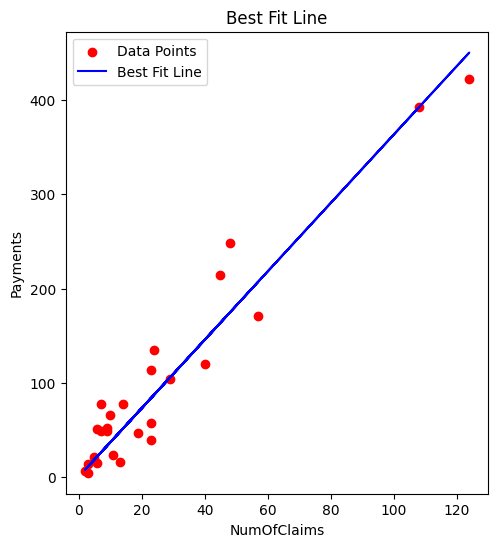

In [20]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.scatter(X, Y, color='red', label='Data Points')
plt.plot(X, theta0 + theta1 * X, color='blue', label='Best Fit Line')
plt.title('Best Fit Line')
plt.xlabel('NumOfClaims')
plt.ylabel('Payments')
plt.legend()
plt.show()

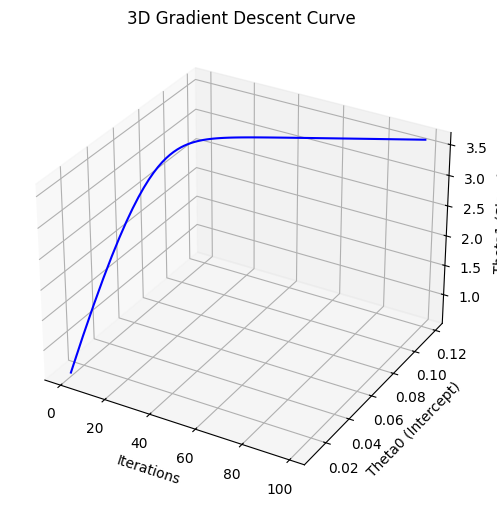

In [21]:

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(range(iterations), theta0_history, theta1_history, color='blue', label='Gradient Descent Path')

ax.set_xlabel('Iterations')
ax.set_ylabel('Theta0 (Intercept)')
ax.set_zlabel('Theta1 (Slope)')
ax.set_title('3D Gradient Descent Curve')
plt.show()
